In [1]:
"""
The classic game of flappy bird. Make with python
and pygame. Features pixel perfect collision using masks :o
Date Modified:  Jul 30, 2019
Author: Tech With Tim
Estimated Work Time: 5 hours (1 just for that damn collision)
"""
import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
cuda:0


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
global target_order
target_order = "supervised"
global temp_list
temp_list = []
Agent_number_n=4;
Alpha = (1-0.650 - 0.01);


# torch.manual_seed(1)    # reproducible
# np.random.seed(1)

# Hyper Parameters
BATCH_SIZE = 64
LR_G = 0.0001           # learning rate for generator
LR_D = 0.0001           # learning rate for discriminator
N_IDEAS = Agent_number_n             # think of this as number of ideas for generating an art work (Generator)
ART_COMPONENTS = Agent_number_n     # it could be total point G can draw in the canvas

In [4]:
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    
    training_data.append(temp_list)
    training_label.append(S)
    

def read_training_data():
    for i in range(10000):
        appen_train(np.random.rand(Agent_number_n));

training_data=[]
training_label=[]
S=1.0
read_training_data();

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    

def read_testing_data():
    for i in range(10000):
        appen_test(np.random.rand(Agent_number_n));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

training_data=np.array(training_data)
training_label=np.array(training_label)
testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(training_data)
print(testing_data)
print(training_label)
print(testing_label)

[[[0.67199714 0.20726383 0.32717455]
  [0.73638192 0.20726383 0.32717455]
  [0.73638192 0.67199714 0.32717455]
  [0.73638192 0.67199714 0.20726383]]

 [[0.82469141 0.42675285 0.1487258 ]
  [0.32134577 0.42675285 0.1487258 ]
  [0.32134577 0.82469141 0.1487258 ]
  [0.32134577 0.82469141 0.42675285]]

 [[0.68877262 0.26289737 0.75297833]
  [0.48907075 0.26289737 0.75297833]
  [0.48907075 0.68877262 0.75297833]
  [0.48907075 0.68877262 0.26289737]]

 ...

 [[0.91956702 0.19199506 0.97869926]
  [0.79604583 0.19199506 0.97869926]
  [0.79604583 0.91956702 0.97869926]
  [0.79604583 0.91956702 0.19199506]]

 [[0.29943255 0.92129232 0.42887955]
  [0.45579636 0.92129232 0.42887955]
  [0.45579636 0.29943255 0.42887955]
  [0.45579636 0.29943255 0.92129232]]

 [[0.09751175 0.10687667 0.46456313]
  [0.84770808 0.10687667 0.46456313]
  [0.84770808 0.09751175 0.46456313]
  [0.84770808 0.09751175 0.10687667]]]
[[[0.35779511 0.3140096  0.42729068]
  [0.82322413 0.3140096  0.42729068]
  [0.82322413 0.3577

In [5]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
training_supervised_label=[]
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(training_data[index][i][0])
        y_list.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    training_supervised_label.append(h_list)
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list))

3.3696596549567577 2.9999999999999996 0.3696596549567581


(tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), tensor([4.]))


In [7]:
def weight_init(m):
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight, gain=nn.init.calculate_gain('relu'))
        torch.nn.init.zeros_(m.bias)
    elif isinstance(m, torch.nn.Linear):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)
        

class Net(torch.nn.Module):
    def __init__(self):

        super(Net, self).__init__()

        num_input = Agent_number_n-1
        num_hidden = 100
        num_output = 1

        self.hidden_0 = torch.nn.Linear(num_input, num_hidden)
        self.hidden_1 = torch.nn.Linear(num_hidden, num_hidden)
        self.hidden_2 = torch.nn.Linear(num_hidden, num_hidden)
        self.hidden_3 = torch.nn.Linear(num_hidden, num_hidden)
        self.output_allocation = torch.nn.Linear(num_hidden, num_output)

    def calculate(self, value_list):
        h1 = torch.relu_(self.hidden_0(value_list))
        h2 = torch.relu_(self.hidden_1(h1))
        h3 = torch.relu_(self.hidden_2(h2))
        h4 = torch.relu_(self.hidden_3(h3))
        h = torch.relu(self.output_allocation(h4))

        return h
    

    def forward(self, input_list,input_label,label):
        global iteration,echo,target_order
        loss1 = 0
        loss2 = 0
        input_list = torch.from_numpy(
            np.array(input_list)).cuda().type(torch.float32)
        h_list = []

        if (target_order == "supervised"):
            loss = 0 
            for i in range(Agent_number_n):
                h = self.calculate(input_list[i])
                loss += torch.square(h - label[i])
                h_list.append(h)
            return loss
        else:
            for i in range(Agent_number_n):
                h = self.calculate(input_list[i])
                h_list.append(h)
            input_label = torch.from_numpy(
                np.array(input_label)).cuda().type(torch.float32)
            sum_h = torch.sum(torch.cat(h_list)).cuda()


            loss1 = torch.where((Agent_number_n-1)*input_label>sum_h,
                            torch.square((Agent_number_n-1)*input_label-sum_h),
                            torch.zeros(1).cuda()
                          )

            loss2 = torch.where((Agent_number_n-Alpha)*input_label<sum_h,
                            torch.square(sum_h-(Agent_number_n-Alpha)*input_label),
                            torch.zeros(1).cuda()
                          )

            return loss1,loss2,h_list

3.9357502460479736 2.884603261947632 1.0511469841003418


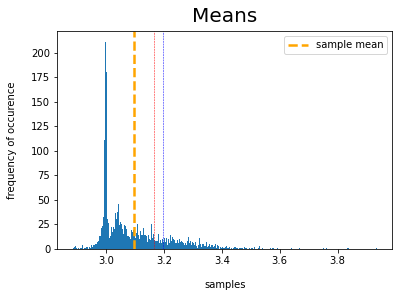

3.960951328277588 2.8708009719848633 1.0901503562927246


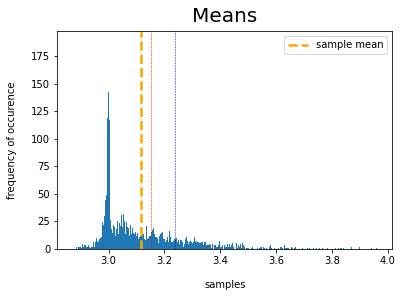

4.778942108154297 2.8532228469848633 1.9257192611694336


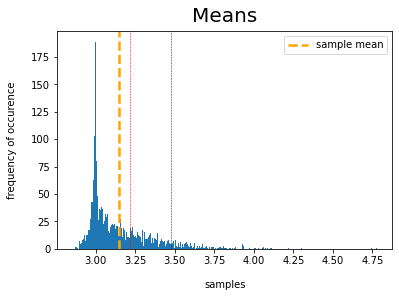

5.020043849945068 2.8382506370544434 2.181793212890625


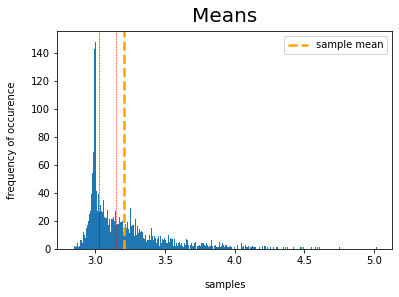

5.294699668884277 2.845592498779297 2.4491071701049805


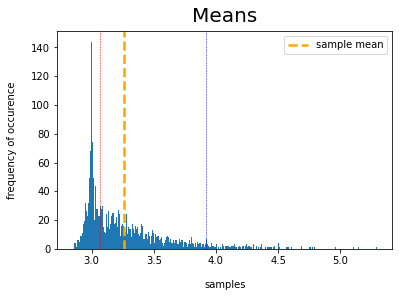

5.324550151824951 2.828301429748535 2.496248722076416


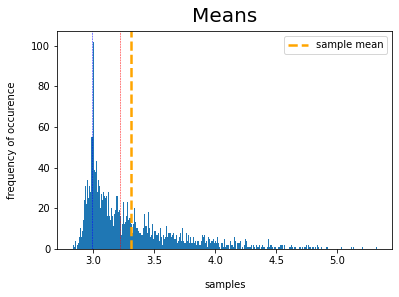

5.774841785430908 2.8276820182800293 2.947159767150879


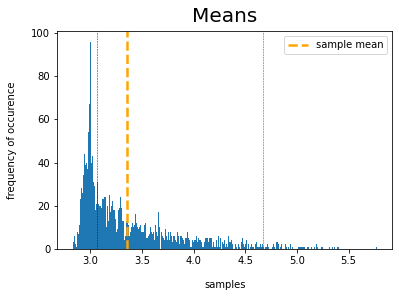

6.538799285888672 2.83394718170166 3.7048521041870117


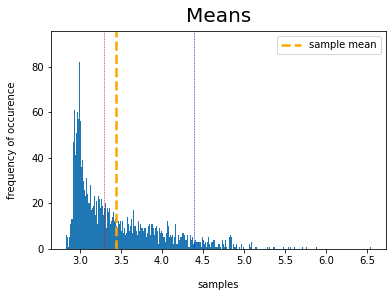

6.28985595703125 2.8328449726104736 3.4570109844207764


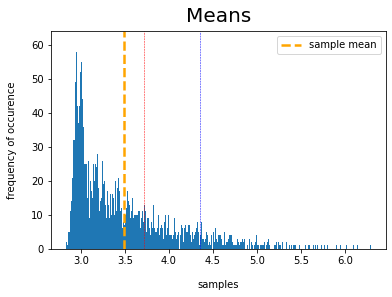

7.020416736602783 2.8217287063598633 4.19868803024292


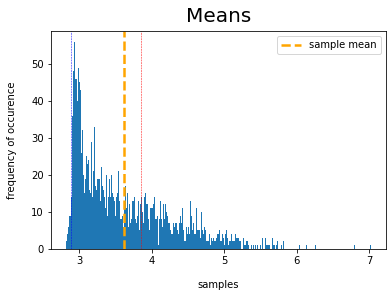

7.094732284545898 2.818960666656494 4.275771617889404


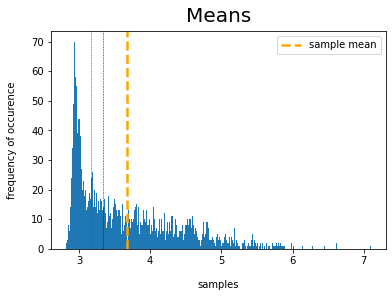

7.8277435302734375 2.8226418495178223 5.005101680755615


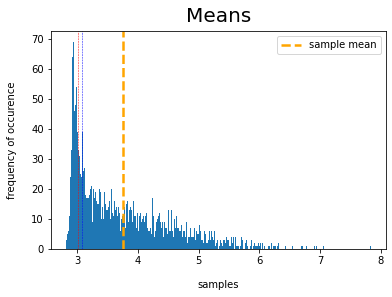

7.851096153259277 2.821923017501831 5.029173135757446


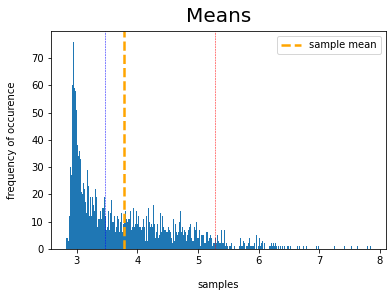

7.998134613037109 2.820578098297119 5.17755651473999


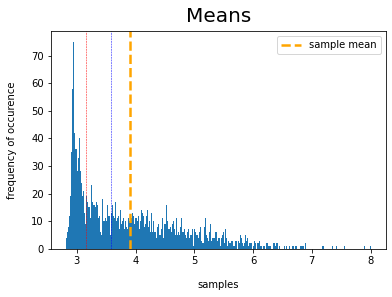

8.033843994140625 2.829700469970703 5.204143524169922


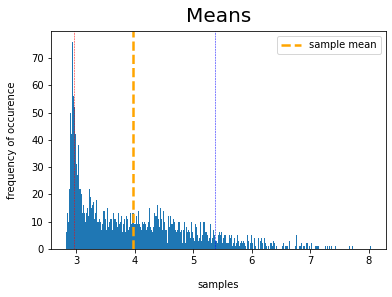

9.247364044189453 2.812317371368408 6.435046672821045


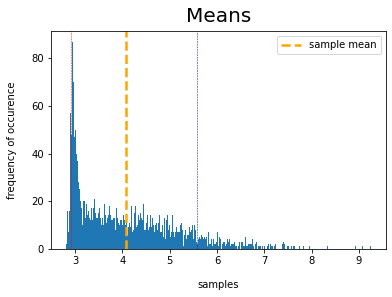

9.972611427307129 2.817821502685547 7.154789924621582


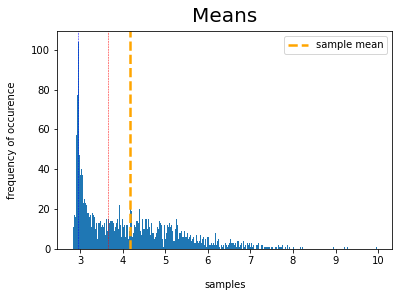

9.422531127929688 2.814051628112793 6.6084794998168945


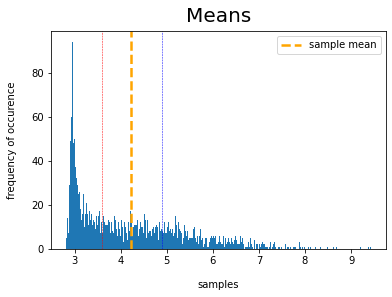

11.12462043762207 2.8039140701293945 8.320706367492676


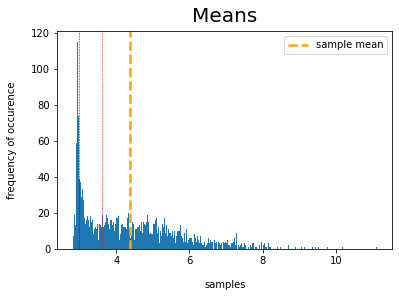

10.817668914794922 2.806777000427246 8.010891914367676


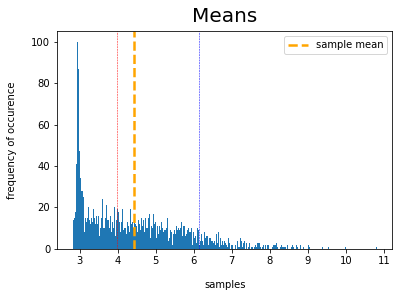

In [8]:
def redistribution_value_function(input_tensor):
    S = torch.max(torch.sum(input_tensor), torch.ones(1))
    temp_list = []


    for i in range(Agent_number_n):
        temp = []
        
        for j in range(Agent_number_n):
            if(i != j):
                temp .append(input_tensor[j])
                
        temp = torch.stack(temp)
        temp_list.append(temp)
    return torch.stack(temp_list), S

GeneratorNet = nn.Sequential(                      # Generator
    # random ideas (could from normal distribution)
    nn.Linear(N_IDEAS, 128),
    nn.ReLU(),
    # making a painting from these random ideas
    nn.Linear(128, ART_COMPONENTS),
)
DiscriminatorNet = torch.load("save/Deep_learning_4_1")
DiscriminatorNet.to(dev)

opt_D = torch.optim.Adam(DiscriminatorNet.parameters(), lr=LR_D)
opt_G = torch.optim.Adam(GeneratorNet.parameters(), lr=LR_G)


DiscriminatorNet.requires_grad = False

show_list = []
for step in range(501):
    # real painting from artist
    G_ideas = torch.randn(BATCH_SIZE, N_IDEAS,
                          requires_grad=True)  # random ideas\n
    # fake painting from G (random ideas)
    G_values = GeneratorNet(G_ideas)
#     print(artist_paintings)
#     print(G_paintings)

    result_list = []
    for index in range(BATCH_SIZE):
        h_list = []
        value_list_tensor, S_tensor = redistribution_value_function(
            G_values[index])
        for i in range(Agent_number_n):
            h = DiscriminatorNet.calculate(
                value_list_tensor[i].cuda().type(torch.float32))
            h_list.append(h)
        h_list = torch.stack(h_list)
        result_list.append(torch.sum(h_list)/S_tensor.cuda())
        show_list.append(float(torch.sum(h_list)/S_tensor.cuda()))
    result_list = torch.stack(result_list)
    
    diff_loss = torch.max(result_list)-torch.min(result_list)
    G_loss = torch.max(- diff_loss)

    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()

    if step % 100 == 0 and step != 0:  # plotting


        print(max(show_list), min(show_list),
              max(show_list)-min(show_list))

        plt.hist(show_list, bins=500)

        plt.title("Means", y=1.015, fontsize=20)
        plt.axvline(x=sum(show_list)/len(show_list), linestyle='--',
                    linewidth=2.5, label="sample mean", c='orange')
        plt.xlabel("samples", labelpad=14)
        plt.ylabel("frequency of occurence", labelpad=14)
        plt.legend()

        show_list.sort()

        plt.axvline(x=result_list[int(len(show_list)*0.001)],
                    linestyle='--', linewidth=0.5, label="0.1%", c='b')
        plt.axvline(x=result_list[int(len(show_list)*0.999)],
                    linestyle='--', linewidth=0.5, label="99%", c='r')
        show_list = []
        plt.show()


In [9]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = DiscriminatorNet.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))

3.378091514110565 2.989164888858795 0.38892662525177


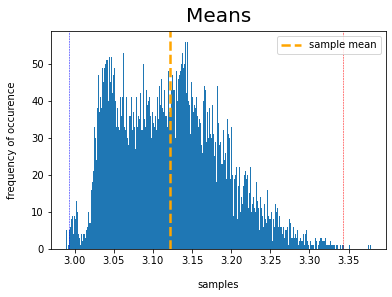

In [10]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.001)], linestyle='--', linewidth=0.5, label="0.1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.999)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()